# TUTORIAL <span style="color:orange;">***MASAÏ***</span><img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.jpg" />

Back to the main [Index](Index.ipynb)

## Part 2. 1D NMR spectrum fitting

#### Configuration

In [1]:
from __future__ import division, print_function

#### Loading the <span style="color:orange;">***MASAÏ***</span> library

In [2]:
from masai.api import *
DATADIR = os.path.join(MASAI,'doc/tutorial/exemples')
FIGDIR = os.path.join(MASAI,'doc/tutorial/figures')

MASAI api loaded: version 0.2.4.8

The current directory is </Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial>
MASAI root directory is </Users/christian/Dropbox/D.PROGRAMMES/masai>


#### Load a 1D fid

Exponential apodization lb:50.00
Zero-filling to si:8192
Fourier transform with si:8192
Auto-phasing :  phc0 = -127.654, phc1 = 99.949
baseline correction mode:linear


<IPython.core.display.Javascript object>


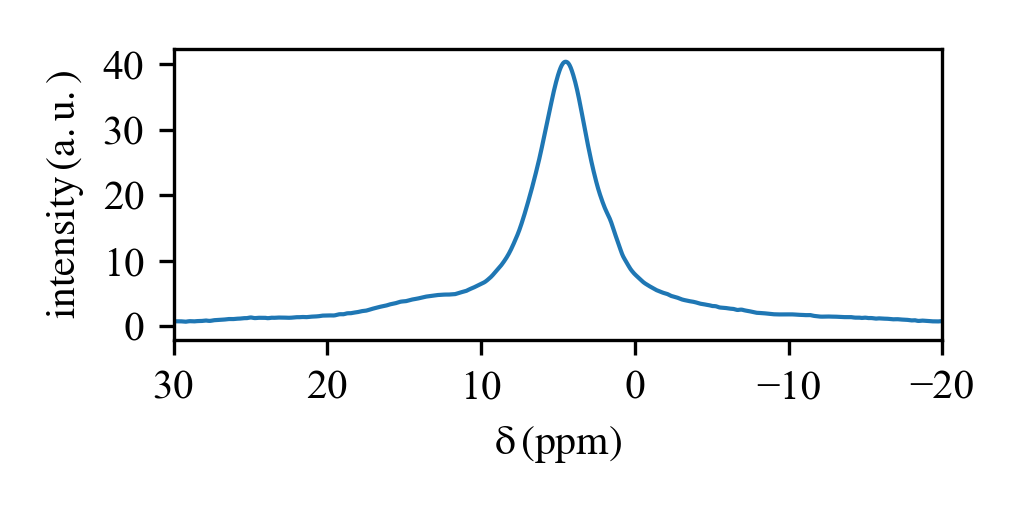

In [3]:
user = 'user'
name = 'SPEC1D'
expno = 10
path = os.path.join(DATADIR,user,'nmr',name, str(expno))
source = Bruker(path)  
Process(source, transform="em 50; zf 1; ft --tdeff 512")
Process(source, transform="pk --auto --fit_phc1 --bound_phc1=100; ab --mode linear")
p = Plot1d(source, xlim=(30, -20))

## How to fit a 1D spectra?

#### Setup the fitting model
The model is defined in the script string below.

Note that the `voigtmodel` is generally quite well adapted to NMR line. The ratio between gaussian and Lorentzian is given by the `ratio` parameter: `0` means a pure Lorentzian, `1` means a pure Gaussian.

In [5]:
script = """
#-----------------------------------------------------------
# syntax for parameters definition:
# name: value, low_bound,  high_bound
#  * for fixed parameters
#  $ for variable parameters
#  > for reference to a parameter in the COMMON block
#    (> is forbidden in the COMMON block)
# common block parameters should not have a _ in their names
#-----------------------------------------------------------
#

COMMON:
# common parameters ex.
# $ gwidth: 1.0, 0.0, none
  $ gratio: 0.5, 0.0, 1.0

MODEL: LINE_1
shape: voigtmodel
    * ampl:  1.0, 0.0, none
    $ pos:   4.5, -100.0, 100.0
    > ratio: gratio
    $ width: 4.0, 0, 20
    
MODEL: LINE_2
shape: voigtmodel
    $ ampl:  0.2, 0.0, none
    $ pos:   1.6, 0, 2.0
    > ratio: gratio
    $ width: 4.0, 0, 20

MODEL: LINE_3
shape: voigtmodel
    $ ampl:  0.18, 0.0, none
    $ pos:   7.9, 5.0, 10.0
    > ratio: gratio
    $ width: 4.0, 0, 20

MODEL: LINE_4
shape: voigtmodel
    $ ampl:  0.1, 0.0, none
    $ pos:   14, 10.0, 20.0
    > ratio: gratio
    $ width: 6.0, 0, 20

MODEL: LINE_5
shape: voigtmodel
    $ ampl:  0.1, 0.0, none
    $ pos:   -5, -8.0, -1.0
    > ratio: gratio
    $ width: 6.0, 0, 10
"""
f = Fit(source, script)

The number of experiment(s) is set to 1


We can display the model with the spectrum using the ***plot_model*** flag .

The offset option gives the negative offset of the model line (in % of the total height).

**TODO:** *we need to improve this plotting later ;-)*

<IPython.core.display.Javascript object>


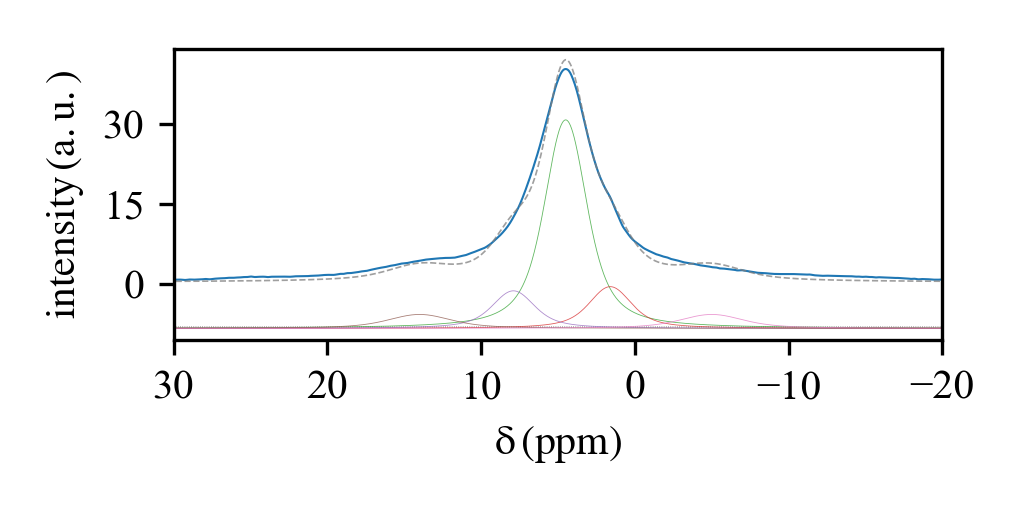

In [6]:
p = Plot1d(source, xlim=(30, -20), lw=.5, modls='--',
            plot_model=True,
            offset=20)

### Now we perform the actual fitting!

Now, to run the fitting procedure, we must use the ***run()*** method of the ***Fit*** object.
After the termination of the above calculations, the `fp` attribute contains the optimized values of the parameters.

In [7]:
f.run(maxiter=1000, every=200)

Iterations: 800, Calls: 1063 (chi2: 0.03806)


Maximum number of iterations reached.


The number of experiment(s) is set to 1

Result:
#PARAMETER SCRIPT

COMMON: 
	$ gratio:     0.4934, 0.0, 1.0 

MODEL: line_1
shape: voigtmodel
	* ampl:     1.0000, 0.0, none 
	$ pos:     4.5020, -100.0, 100.0 
	> ratio: gratio 
	$ width:     5.0885, 0, 20 

MODEL: line_2
shape: voigtmodel
	$ ampl:     0.3028, 0.0, none 
	$ pos:     0.9514, 0, 2.0 
	> ratio: gratio 
	$ width:    19.4185, 0, 20 

MODEL: line_3
shape: voigtmodel
	$ ampl:     0.1915, 0.0, none 
	$ pos:     8.3962, 5.0, 10.0 
	> ratio: gratio 
	$ width:    15.9634, 0, 20 

MODEL: line_4
shape: voigtmodel
	$ ampl:     0.1198, 0.0, none 
	$ pos:    16.4536, 10.0, 20.0 
	> ratio: gratio 
	$ width:    19.9831, 0, 20 

MODEL: line_5
shape: voigtmodel
	$ ampl:     0.0126, 0.0, none 
	$ pos:    -7.9993, -8.0, -1.0 
	> ratio: gratio 
	$ width:     9.9631, 0, 10 



The source can be plotted as previously

<IPython.core.display.Javascript object>


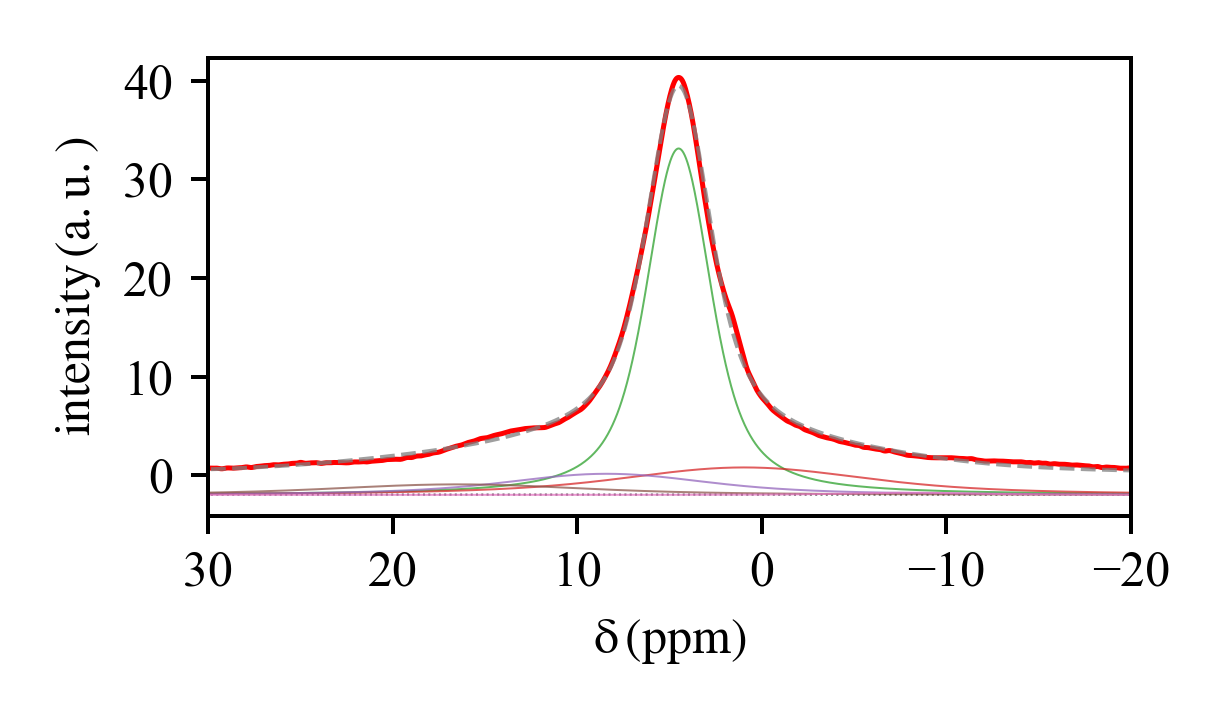

In [8]:
p = Plot1d(source, 
            figsize=(3.4, 2.0), dpi=180, xlim=(30, -20), 
            c='red', lw=1, 
            plot_model=True, modls='--', offset=5,
            savename = os.path.join(FIGDIR, 'fit.png'))

If we immediately run it again, it will continue using the last fitted parameters

We may want to freeze or defreeze one or more parameters, e.g., 'gratio' or to change the bounds. For this we need to use the dictionary of fitted parameters 'fp'.
    

#PARAMETER SCRIPT

COMMON: 
	* gratio:     0.4934, 0.0, 1.0 

MODEL: line_1
shape: voigtmodel
	* ampl:     1.0000, 0.0, none 
	$ pos:     4.4000, 0, 5 
	> ratio: gratio 
	$ width:     5.0885, 0, 20 

MODEL: line_2
shape: voigtmodel
	$ ampl:     0.3028, 0.0, none 
	$ pos:     0.9514, 0, 2.0 
	> ratio: gratio 
	$ width:    19.4185, 14.0, 15.0 

MODEL: line_3
shape: voigtmodel
	$ ampl:     0.1915, 0.0, none 
	$ pos:     8.3962, 5.0, 10.0 
	> ratio: gratio 
	$ width:    15.9634, 0, 20 

MODEL: line_4
shape: voigtmodel
	$ ampl:     0.1198, 0.0, none 
	$ pos:    16.4536, 10.0, 20.0 
	> ratio: gratio 
	$ width:    19.9831, 0, 20 

MODEL: line_5
shape: voigtmodel
	$ ampl:     0.0126, 0.0, none 
	$ pos:    -7.9993, -8.0, -1.0 
	> ratio: gratio 
	$ width:     9.9631, 0, 10 



<IPython.core.display.Javascript object>


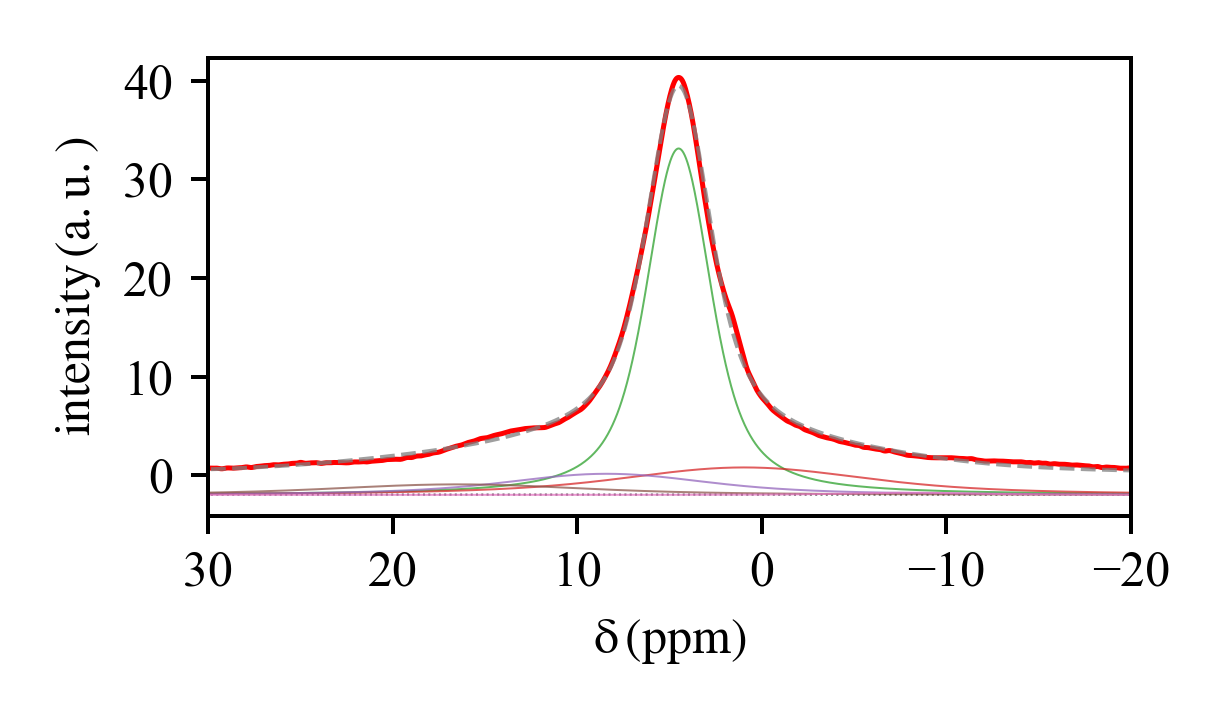

In [9]:
f.fp.fixed['gratio']=True      # fix common parameter ratio
f.fp.upb['width_line_2']=15.0    # fix width upper bound for line 2
f.fp.lob['width_line_2']=14.0    # lower bound
f.fp['pos_line_1']= 4.4, 0 , 5, False   # make value, lob, upb, and unfixed at once 
print(f.fp) # to check

p = Plot1d(source, 
            figsize=(3.4, 2.0), dpi=180, xlim=(30, -20), 
            c='red', lw=1, 
            plot_model=True, modls='--', offset=5,
            savename = os.path.join(FIGDIR, 'fit.png'))

In [10]:
f.run()

Iterations: 90, Calls: 133 (chi2: 0.03854)
The number of experiment(s) is set to 1

Result:
#PARAMETER SCRIPT

COMMON: 
	* gratio:     0.4934, 0.0, 1.0 

MODEL: line_1
shape: voigtmodel
	* ampl:     1.0000, 0.0, none 
	$ pos:     4.5172, 0, 5 
	> ratio: gratio 
	$ width:     5.0995, 0, 20 

MODEL: line_2
shape: voigtmodel
	$ ampl:     0.2498, 0.0, none 
	$ pos:     0.9529, 0, 2.0 
	> ratio: gratio 
	$ width:    14.9998, 14.0, 15.0 

MODEL: line_3
shape: voigtmodel
	$ ampl:     0.2144, 0.0, none 
	$ pos:     8.4310, 5.0, 10.0 
	> ratio: gratio 
	$ width:    15.7969, 0, 20 

MODEL: line_4
shape: voigtmodel
	$ ampl:     0.1256, 0.0, none 
	$ pos:    16.4220, 10.0, 20.0 
	> ratio: gratio 
	$ width:    19.9483, 0, 20 

MODEL: line_5
shape: voigtmodel
	$ ampl:     0.0134, 0.0, none 
	$ pos:    -7.9933, -8.0, -1.0 
	> ratio: gratio 
	$ width:     9.9585, 0, 10 



Maximum number of iterations reached.


<IPython.core.display.Javascript object>


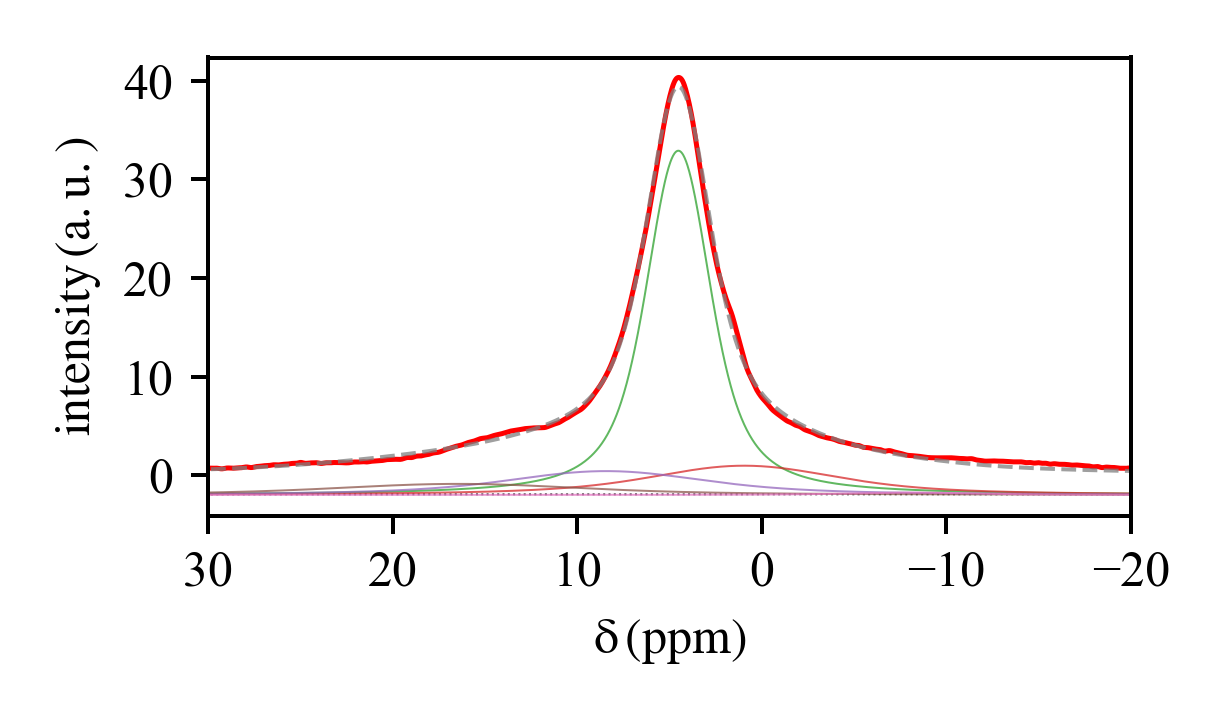

In [11]:
p = Plot1d(source, 
            figsize=(3.4, 2.0), dpi=180, xlim=(30, -20), 
            c='red', lw=1, 
            plot_model=True, modls='--', offset=5,
            savename = os.path.join(FIGDIR, 'fit.png'))

#### How to get help?

In [11]:
Fit()

## How to fit several spectra simultaneously?

This is still experimental, but may be useful in some cases.

Example here with the simultaneous fitting of the single-pulse and CP spectra of the RUB-17

In [12]:
name = 'RUB-17'
expno = '2'
path1D = os.path.join(DATADIR,user,'nmr',name, str(expno))
source1D = Bruker(path1D)
Process(source1D, transform='em 1; zf 3; ft; cl -105 -77; pk --fit_phc1 --auto; ab --mode poly')

removed 152
Loaded FID
Exponential apodization lb:1.00
Zero-filling to si:32768
Fourier transform with si:32768
clipping along axis -1
Auto-phasing :  phc0 = -16.911, phc1 = 0.036
baseline correction mode:poly


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

In [13]:
source1D

***Bruker Source***
- path: /Users/christian/Dropbox/PycharmProjects/masai/doc/tutorial/exemples/user/nmr/RUB-17/2
- datatype: 1D NMR FID
- pulse program: zg.lcs
- TD: 32768
- Limits: -77.01 to -104.995 ppm

In [14]:
name = 'RUB-17'
expno = '1'
pathCP = os.path.join(DATADIR,user,'nmr',name, str(expno))
sourceCP = Bruker(pathCP)
Process(sourceCP, transform='em 1; zf 3; ft; cl -105 -77; pk --fit_phc1 --auto; ab --mode poly')

removed 152
Loaded FID
Exponential apodization lb:1.00
Zero-filling to si:32768
Fourier transform with si:32768
clipping along axis -1
Auto-phasing :  phc0 = -107.051, phc1 = -8.559
baseline correction mode:poly


Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command


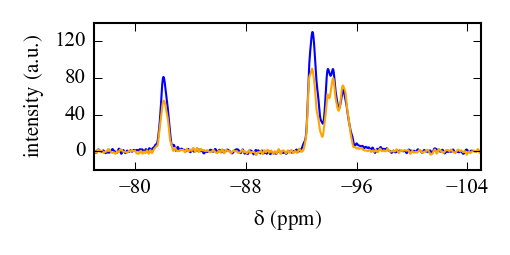

In [15]:
# pC = Stackplot([source1D, sourceCP], colorbar=False)
# TODO: make the stackplot working for this kind of data

pC = Plot1d(source1D, hold=True)
pC = Plot1d(sourceCP, axe=pC.axe, c='orange')
pC.show()
#TODO: improve the plot1d classe to allow plot of several spectra 
#      (may be in a different way that Stackplot)

#### Setup the fitting model
Again, the model is defined in the script string below taking account the fact that we have several experiment. 

We use the keyword: `experiment_variables` to specify which variable is changing between experiments. Several separated by space can be specified on this line.

In [16]:
pos = [-82.15, -92.7585392549, -92.9, -94.1, -94.4, -95.1, -95.32]

script = """
COMMON:
  experiment_variables: ampl
  $ gwidth: 0.5, 0.4, 0.6
  $ gratio: 0.5, 0.0, 1.0
  
"""
for i, delta in enumerate(pos):
    fa = '*' if i==0 else '$'
    script +=""" 
MODEL: LINE_%d
shape: voigtmodel
    %s ampl:  1, 0.5, 2
    $ pos: %.3f, %.3f, %.3f
    > ratio: gratio
    > width: gwidth

    """%(i, fa, delta, delta-0.3, delta+0.3) 
print(script)

# prepare fit
f = Fit([source1D, sourceCP], script)


COMMON:
  experiment_variables: ampl
  $ gwidth: 0.5, 0.4, 0.6
  $ gratio: 0.5, 0.0, 1.0
  
 
MODEL: LINE_0
shape: voigtmodel
    * ampl:  1, 0.5, 2
    $ pos: -82.150, -82.450, -81.850
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_1
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -92.759, -93.059, -92.459
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_2
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -92.900, -93.200, -92.600
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_3
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -94.100, -94.400, -93.800
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_4
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -94.400, -94.700, -94.100
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_5
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -95.100, -95.400, -94.800
    > ratio: gratio
    > width: gwidth

     
MODEL: LINE_6
shape: voigtmodel
    $ ampl:  1, 0.5, 2
    $ pos: -95.3

Now we run the fit as usual. You can notice that the script is modified for the variable parameters as a results

In [17]:
f.run(maxiter=200)

Iterations: 190, Calls: 234 (chi2: 0.28041)
The number of experiment(s) is set to 2

Result:
#PARAMETER SCRIPT

COMMON: 
	experiment_number: 2 
	experiment_variables:  ampl 
	$ gwidth: 0.50024139365, 0.4, 0.6 
	$ gratio: 0.501452659419, 0.0, 1.0 

MODEL: line_0
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	* ampl: [1, 1], 0.5, 2 
	$ pos: -82.15, -82.45, -81.85 

MODEL: line_1
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -92.7583036149, -93.059, -92.459 
	$ ampl: [1.2016548552328099, 1.2256680250206728], 0.5, 2 

MODEL: line_2
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -92.9, -93.2, -92.6 
	$ ampl: [1.211999578119304, 1.0340133764001513], 0.5, 2 

MODEL: line_3
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -94.1, -94.4, -93.8 
	$ ampl: [1.1013105917803463, 1.1489571365606652], 0.5, 2 

MODEL: line_4
shape: voigtmodel
	> ratio: gratio 
	$ pos: -94.4, -94.7, -94.1 
	> width: gwidth 
	$ ampl: [1.3589392234372779, 1.35421681390492

Maximum number of iterations reached.


Of course it is possible to specify the starting parameters the same way

e.g., we use the last fit and continue it as it is not finished

In [18]:
f.run(maxiter=1000)

Iterations: 990, Calls: 1189 (chi2: 0.24454)
The number of experiment(s) is set to 2

Result:
#PARAMETER SCRIPT

COMMON: 
	experiment_number: 2 
	experiment_variables:  ampl 
	$ gwidth: 0.500308840882, 0.4, 0.6 
	$ gratio: 0.502813568446, 0.0, 1.0 

MODEL: line_0
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	* ampl: [1, 1], 0.5, 2 
	$ pos: -82.15, -82.45, -81.85 

MODEL: line_1
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -92.7518239458, -93.059, -92.459 
	$ ampl: [1.0487818013819166, 1.2130881607929784], 0.5, 2 

MODEL: line_2
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -92.9, -93.2, -92.6 
	$ ampl: [1.0045280671378567, 0.88730669231724724], 0.5, 2 

MODEL: line_3
shape: voigtmodel
	> ratio: gratio 
	> width: gwidth 
	$ pos: -94.1, -94.4, -93.8 
	$ ampl: [1.0871593711369576, 1.2014905524426434], 0.5, 2 

MODEL: line_4
shape: voigtmodel
	> ratio: gratio 
	$ pos: -94.4, -94.7, -94.1 
	> width: gwidth 
	$ ampl: [0.69234138408635526, 0.889493364

Maximum number of iterations reached.


#### Show the results


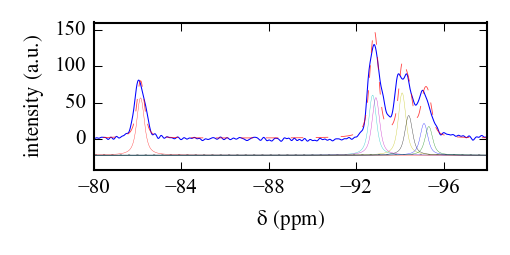


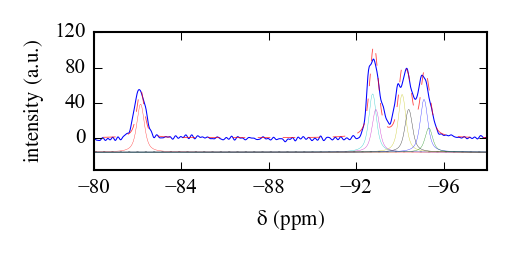

In [19]:
# initial model plot
p = Plot1d(source1D,
            lw=.5, 
            plot_model=True,
            modls = '--', offset=15,
            xlim=(-98,-80))
# initial model plot
p = Plot1d(sourceCP, 
            lw=.5,
            plot_model=True,
            modls = '--', offset=15,
            xlim=(-98,-80))

Back to the main [Index](Index.ipynb)

In [20]:
from masai.plugins.sources.bruker import unit_conversion